In [1]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [3]:
len(movie_reviews.words())

1583820

In [5]:
movie_reviews.categories()

['neg', 'pos']

In [12]:
movie_reviews.fileids('pos')[:5]

['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt']

In [19]:
(list(movie_reviews.words('pos/cv000_29590.txt')),'pos')[0][:5]

['films', 'adapted', 'from', 'comic', 'books']

In [22]:
(list(movie_reviews.words('pos/cv000_29590.txt')))[:5]

['films', 'adapted', 'from', 'comic', 'books']

In [53]:
cats = movie_reviews.categories()
print("cats : ",cats)
reviews = []
for cat in cats:
    for fid in movie_reviews.fileids(cat):
        #print(fid)
        review = (list(movie_reviews.words(fid)),cat)
        reviews.append(review)

random.shuffle(reviews)
print(reviews[0])

cats :  ['neg', 'pos']
(['now', ',', 'lets', 'first', 'look', 'into', 'the', 'history', 'of', 'shark', 'films', '.', 'there', 'was', 'the', 'unforgettable', 'jaws', '.', 'the', 'exciting', 'jaws', '2', '.', 'the', 'rather', 'flaky', 'jaws', '3d', 'and', 'sometime', 'in', 'the', 'late', '90s', 'another', 'film', 'of', 'the', 'same', 'genre', 'that', 'i', 'can', "'", 't', 'seem', 'to', 'recall', '(', 'about', 'the', 'son', 'of', 'jaws', 'returning', 'to', 'wreak', 'revenge', 'or', 'something', 'like', 'that', ')', '.', 'now', ',', 'with', 'the', 'magic', 'of', 'cgi', ',', 'one', 'shark', 'is', 'simply', 'not', 'enough', ';', 'in', 'deep', 'blue', 'sea', ',', 'there', 'are', '3', 'big', ',', 'mean', 'and', 'really', 'smart', 'ones', '!', 'russell', 'frankiln', '(', 'jackson', ')', 'visits', 'aquatica', '(', 'a', 'sea', '-', 'bound', 'research', 'center', ')', ',', 'where', 'a', 'research', 'is', 'being', 'conducted', 'on', 'the', 'extraction', 'of', 'a', 'hormone', 'substance', 'found', '

In [69]:
print(type(reviews))

<class 'list'>


In [72]:
print(len(reviews[1]))

2


In [77]:
reviews[0][1]

'pos'

In [80]:
reviews[1][1]

'neg'

In [83]:
for word in set(reviews[0][0]):
    print(word in top_wd_in_reviews)

True
True
False
True
False
False
True
True
True
False
True
False
False
True
False
False
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
False
False
True
True
False
True
True
True
True
True
True
True
True
False
True
False
True
False
True
True
True
False
False
True
False
False
True
True
True
False
False
True
True
True
True
True
True
False
True
True
True
True
True
False
False
True
True
True
False
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
False
False
True
True
True
False
True
True
True
False
True
True
True
True
False
False
True
True
True
True
False
True
False
True
True
True
True
False
False
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
False
True
False
False
False
False
False
False
False
False
True
True
False
True
True
True
False
False
False
False
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False

In [33]:
all_wd_in_reviews = nltk.FreqDist(wd.lower() for wd in movie_reviews.words())


In [40]:
all_wd_in_reviews.most_common(10)[:3]

[(',', 77717), ('the', 76529), ('.', 65876)]

In [50]:
for wds in zip(*all_wd_in_reviews.most_common(10)):
    print(list(wds))


[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']
[77717, 76529, 65876, 38106, 35576, 34123, 31937, 30585, 25195, 21822]


In [61]:
# here we are storing only the most frequently occuring 2000 words and their respective counts in second element of list 
#not considered
top_wd_in_reviews = [list(wds) for wds in zip(*all_wd_in_reviews.most_common(2000))][0]

In [62]:
#define a function to check if the review word either positive or negative is present in the first most common 2000 words
def ext_ft(review,top_words):
    review_wds = set(review)
    ft = {}
    for wd in top_words:
        ft['word_present({})'.format(wd)] = (wd in review_wds)
    return ft

In [64]:
#here d resembles review test words while c resembles review type  either 'pos' or 'neg'
featuresets = [(ext_ft(d,top_wd_in_reviews), c) for (d,c) in reviews]

In [104]:
list(featuresets[0][0].items())[:5]

[('word_present(barely)', False),
 ('word_present(gangster)', False),
 ('word_present(moments)', False),
 ('word_present(house)', False),
 ('word_present(soon)', False)]

In [110]:
featuresets[0][1]

'pos'

In [112]:
len(featuresets[:200])

200

In [63]:
#train test split for the related features
train_set, test_set = featuresets[200:], featuresets[:200]

In [114]:
# Training the data by building a naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [116]:
print(nltk.classify.accuracy(classifier, test_set))

0.805


In [118]:
classifier.show_most_informative_features(30)

Most Informative Features
word_present(outstanding) = True              pos : neg    =     13.8 : 1.0
    word_present(seagal) = True              neg : pos    =     12.9 : 1.0
     word_present(mulan) = True              pos : neg    =      9.1 : 1.0
word_present(wonderfully) = True              pos : neg    =      7.8 : 1.0
     word_present(damon) = True              pos : neg    =      6.2 : 1.0
    word_present(poorly) = True              neg : pos    =      6.0 : 1.0
     word_present(flynt) = True              pos : neg    =      5.7 : 1.0
     word_present(bland) = True              neg : pos    =      5.5 : 1.0
     word_present(awful) = True              neg : pos    =      5.3 : 1.0
      word_present(lame) = True              neg : pos    =      5.2 : 1.0
    word_present(wasted) = True              neg : pos    =      5.2 : 1.0
word_present(ridiculous) = True              neg : pos    =      5.0 : 1.0
     word_present(waste) = True              neg : pos    =      4.8 : 1

#### Using Random Forest Classifier


In [119]:
dict_vectorizer=None
def get_train_test(train_set,test_set):
    global dict_vectorizer
    dict_vectorizer = DictVectorizer(sparse=False)
    X_train, y_train = zip(*train_set)
    X_train = dict_vectorizer.fit_transform(X_train)
    X_test,y_test = zip(*test_set)
    X_test = dict_vectorizer.transform(X_test)
    return X_train,X_test,y_train,y_test

In [122]:
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(1800, 2000)
1800
(200, 2000)
200


In [124]:
#### Hyperparameter tuning using RandomizedSearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [125]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [127]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1)
#Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=False, n_estimators=133, max_features=auto, min_samples_split=10, min_samples_leaf=2, max_depth=40 
[CV]  bootstrap=False, n_estimators=133, max_features=auto, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   2.2s
[CV] bootstrap=False, n_estimators=133, max_features=auto, min_samples_split=10, min_samples_leaf=2, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  bootstrap=False, n_estimators=133, max_features=auto, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   2.0s
[CV] bootstrap=False, n_estimators=133, max_features=auto, min_samples_split=10, min_samples_leaf=2, max_depth=40 
[CV]  bootstrap=False, n_estimators=133, max_features=auto, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   1.7s
[CV] bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=40 
[CV]  bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=40, total=   1.6s
[CV] bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=40 
[CV]  bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=40, total=   1.7s
[CV] bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=40 
[CV]  bootstrap=Fals

[CV]  bootstrap=False, n_estimators=23, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] bootstrap=True, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=None 
[CV]  bootstrap=True, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=None, total=   0.5s
[CV] bootstrap=True, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=None 
[CV]  bootstrap=True, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=None, total=   0.5s
[CV] bootstrap=True, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=None 
[CV]  bootstrap=True, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=None, total=   0.6s
[CV] bootstrap=False, n_estimators=67, max_features=auto, min_samples_split=2, min_samples_leaf=1, max_depth=100 
[CV]  bootstrap=False, n_est

[CV]  bootstrap=True, n_estimators=111, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] bootstrap=True, n_estimators=111, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=90 
[CV]  bootstrap=True, n_estimators=111, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=90, total=   1.0s
[CV] bootstrap=True, n_estimators=111, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=90 
[CV]  bootstrap=True, n_estimators=111, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=90, total=   1.1s
[CV] bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   1.4s
[CV] bootstrap=False, n_estimators=111, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  bootstrap=False, n

[CV]  bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=20, total=   1.7s
[CV] bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=20 
[CV]  bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=1, max_depth=20, total=   1.9s
[CV] bootstrap=True, n_estimators=155, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=70 
[CV]  bootstrap=True, n_estimators=155, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=70, total=   1.4s
[CV] bootstrap=True, n_estimators=155, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=70 
[CV]  bootstrap=True, n_estimators=155, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=70, total=   1.4s
[CV] bootstrap=True, n_estimators=155, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=70 
[CV]  bootstrap=True, n_estimator

[CV]  bootstrap=False, n_estimators=133, max_features=sqrt, min_samples_split=5, min_samples_leaf=1, max_depth=110, total=   1.7s
[CV] bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV]  bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=2, min_samples_leaf=1, max_depth=70, total=   2.1s
[CV] bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV]  bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=2, min_samples_leaf=1, max_depth=70, total=   1.9s
[CV] bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=2, min_samples_leaf=1, max_depth=70 
[CV]  bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=2, min_samples_leaf=1, max_depth=70, total=   1.8s
[CV] bootstrap=False, n_estimators=1, max_features=auto, min_samples_split=10, min_samples_leaf=1, max_depth=20 
[CV]  bootstrap=False, n_estimator

[CV]  bootstrap=False, n_estimators=1, max_features=sqrt, min_samples_split=2, min_samples_leaf=4, max_depth=110, total=   0.0s
[CV] bootstrap=True, n_estimators=133, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  bootstrap=True, n_estimators=133, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   1.1s
[CV] bootstrap=True, n_estimators=133, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  bootstrap=True, n_estimators=133, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   1.2s
[CV] bootstrap=True, n_estimators=133, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  bootstrap=True, n_estimators=133, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   1.1s
[CV] bootstrap=False, n_estimators=177, max_features=sqrt, min_samples_split=5, min_samples_leaf=4, max_depth=70 
[CV]  bootstrap=False, 

[CV]  bootstrap=True, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=80, total=   1.5s
[CV] bootstrap=True, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=80 
[CV]  bootstrap=True, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=80, total=   1.4s
[CV] bootstrap=True, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=80 
[CV]  bootstrap=True, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=4, max_depth=80, total=   1.5s
[CV] bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=5, min_samples_leaf=2, max_depth=110 
[CV]  bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=5, min_samples_leaf=2, max_depth=110, total=   1.8s
[CV] bootstrap=True, n_estimators=200, max_features=sqrt, min_samples_split=5, min_samples_leaf=2, max_depth=110 
[CV]  bootstrap=True, n_estimator

[CV]  bootstrap=False, n_estimators=200, max_features=auto, min_samples_split=5, min_samples_leaf=4, max_depth=50, total=   2.6s
[CV] bootstrap=False, n_estimators=200, max_features=auto, min_samples_split=5, min_samples_leaf=4, max_depth=50 
[CV]  bootstrap=False, n_estimators=200, max_features=auto, min_samples_split=5, min_samples_leaf=4, max_depth=50, total=   2.4s
[CV] bootstrap=False, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=110 
[CV]  bootstrap=False, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=110, total=   2.9s
[CV] bootstrap=False, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=110 
[CV]  bootstrap=False, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=110, total=   2.3s
[CV] bootstrap=False, n_estimators=200, max_features=sqrt, min_samples_split=10, min_samples_leaf=4, max_depth=110 
[CV]  bootstrap=Fa

[CV]  bootstrap=False, n_estimators=67, max_features=sqrt, min_samples_split=2, min_samples_leaf=2, max_depth=60, total=   1.1s
[CV] bootstrap=False, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=2, max_depth=40 
[CV]  bootstrap=False, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=2, max_depth=40, total=   3.7s
[CV] bootstrap=False, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=2, max_depth=40 
[CV]  bootstrap=False, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=2, max_depth=40, total=   3.7s
[CV] bootstrap=False, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=2, max_depth=40 
[CV]  bootstrap=False, n_estimators=177, max_features=auto, min_samples_split=2, min_samples_leaf=2, max_depth=40, total=   2.6s
[CV] bootstrap=False, n_estimators=89, max_features=sqrt, min_samples_split=10, min_samples_leaf=2, max_depth=70 
[CV]  bootstrap=False, n_esti

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'n_estimators': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [128]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 133}

In [130]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 80,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 5,
 n_estimators= 133,
random_state=10)

In [131]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=133, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [132]:
predictions = rf.predict(X_test)

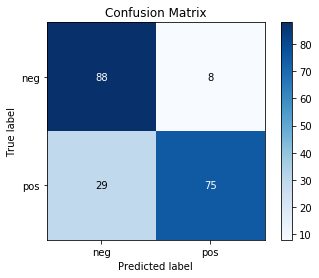

In [136]:
import scikitplot
%matplotlib inline
scikitplot.metrics.plot_confusion_matrix(y_test,predictions)

In [137]:
print('Accuracy Score : ',accuracy_score(y_test,predictions))

Accuracy Score :  0.815


#### Training the model after removing stop words

In [138]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
all_words_in_reviews = nltk.FreqDist(word.lower() for word in movie_reviews.words() if word not in stopwords_list)
top_words_in_reviews = [list(words) for words in zip(*all_words_in_reviews.most_common(2000))][0]

In [139]:
featuresets = [(ext_ft(d,top_words_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)

In [140]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=133, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [141]:
predictions = rf.predict(X_test)

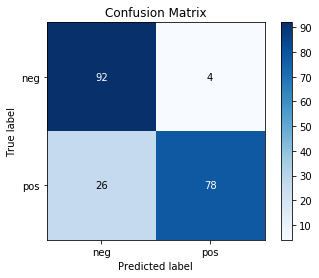

In [142]:
scikitplot.metrics.plot_confusion_matrix(y_test,predictions)

In [143]:
print('Accuracy Score : ',accuracy_score(y_test,predictions))

Accuracy Score :  0.85


In [148]:
features_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
features_list = sorted(features_list, key=lambda x: x[1], reverse=True)
#features_list = sorted(features_list,reverse=True)
print(features_list[0:20])

[('word_present(bad)', 0.02617183633282115), ('word_present(worst)', 0.011079039903590604), ('word_present(boring)', 0.010191700538319711), ('word_present(mess)', 0.008286172529669757), ('word_present(stupid)', 0.0079906330433508), ('word_present(awful)', 0.007902269492777683), ('word_present(outstanding)', 0.007721536494692444), ('word_present(waste)', 0.0073572997654592), ('word_present(plot)', 0.006550555072123443), ('word_present(ridiculous)', 0.00597412272619634), ('word_present(nothing)', 0.005709201504875984), ('word_present(supposed)', 0.0051189413875651485), ('word_present(performances)', 0.005089537498542844), ('word_present(wasted)', 0.005046529325178262), ('word_present(many)', 0.005044178485507279), ('word_present(true)', 0.004857755578889142), ('word_present(lame)', 0.004651736343982624), ('word_present(great)', 0.004565380280621675), ('word_present(wonderfully)', 0.004558149594604502), ('word_present(memorable)', 0.004550048992490794)]
